In [1]:
#Reading the data into pandas

In [2]:
import pandas as pd    

In [3]:
weather = pd.read_csv("hanoi_1982-02-11_2022-10-30.csv", index_col="DATE") #setting the DATE column as index column

In [4]:
weather

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
1982-02-11,VMM00048820,"NOIBAI INTERNATIONAL, VM",0.0,12.2,15.1,NaN
1982-02-12,VMM00048820,"NOIBAI INTERNATIONAL, VM",NaN,13.1,14.1,NaN
1982-02-13,VMM00048820,"NOIBAI INTERNATIONAL, VM",0.0,12.4,13.8,NaN
1982-02-14,VMM00048820,"NOIBAI INTERNATIONAL, VM",0.0,13.4,15.8,NaN
1982-02-16,VMM00048820,"NOIBAI INTERNATIONAL, VM",0.0,13.6,15.5,10.2
...,...,...,...,...,...,...
2022-10-26,VMM00048825,"HA DONG, VM",0.0,25.4,NaN,23.0
2022-10-27,VMM00048825,"HA DONG, VM",NaN,26.1,NaN,NaN
2022-10-28,VMM00048825,"HA DONG, VM",NaN,26.3,NaN,NaN


In [111]:
weather.TMAX.duplicated()
weather["test1"] = weather["PRCP"].copy()

In [89]:
weather.index.is_unique

False

In [5]:
## Here's some examples of how we can use the index column:

In [6]:
#Look at data for a particular day:
#weather.loc["1958-12-18",:]

In [7]:
#Look at data in a specific range:
#weather.loc["2022-10-01":"2022-10-28",:]

In [8]:
#Preparing the data for machine learning: clean data, get rid of missing values

In [9]:
#Fix missing values:
weather.apply(pd.isnull).sum()/weather.shape[0]*100
# weather.apply(pd.isnull) gives which columns have missing values
# sum() gives the count of all the null values in each column
# divide by weather.shape[0] (number of rows in weather) to get percentage
# => percentage of null values in each column

STATION     0.000000
NAME        0.000000
PRCP       37.089458
TAVG        0.000000
TMAX       48.144707
TMIN       66.244057
dtype: float64

In [10]:
#select core data for analyzing: select a few columns from the data set and copy them into a new dataframe
core_weather = weather[["PRCP","TAVG","TMAX"]].copy()

In [11]:
 #rename the columns to make it easier to work with:
core_weather.columns = ["precip","temp_avg","temp_max"]

In [12]:
core_weather

,precip,temp_avg,temp_max
DATE,,,
1982-02-11,0.0,12.2,15.1
1982-02-12,NaN,13.1,14.1
1982-02-13,0.0,12.4,13.8
1982-02-14,0.0,13.4,15.8
1982-02-16,0.0,13.6,15.5
...,...,...,...
2022-10-26,0.0,25.4,NaN
2022-10-27,NaN,26.1,NaN
2022-10-28,NaN,26.3,NaN


In [13]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]*100

precip      37.089458
temp_avg     0.000000
temp_max    48.144707
dtype: float64

In [14]:
core_weather[pd.isnull(core_weather["precip"])] #only select rows where precipitation is null

,precip,temp_avg,temp_max
DATE,,,
1982-02-12,NaN,13.1,14.1
1982-02-17,NaN,14.5,NaN
1982-02-18,NaN,15.8,16.7
1982-02-19,NaN,18.2,19.8
1982-02-20,NaN,22.3,NaN
...,...,...,...
2022-10-17,NaN,26.4,NaN
2022-10-23,NaN,27.7,NaN
2022-10-24,NaN,27.9,NaN


In [15]:
#apparently there are 6787 rows where precipitation is missing (lmao that's a lot)

In [16]:
#we can see that 12 Feb 1982 is a day where precip is missing, so we can take a look at what happened before and after that.

In [17]:
core_weather.loc["1982-02-11":"1982-02-16"]

,precip,temp_avg,temp_max
DATE,,,
1982-02-11,0.0,12.2,15.1
1982-02-12,NaN,13.1,14.1
1982-02-13,0.0,12.4,13.8
1982-02-14,0.0,13.4,15.8
1982-02-16,0.0,13.6,15.5


In [18]:
#so there was no precipitation from 11th to 16th. now what we're gonna do is figure out what we want to replace this missing value with.

In [19]:
#there are 2 strategies. we could try the forward fill which is to replace with the value that came directly before (in this case a 0).

In [20]:
core_weather["precip"].value_counts()

0.0     7868
0.3      315
0.5      310
1.0      248
0.8      188
        ... 
47.8       1
70.9       1
41.7       1
54.9       1
44.5       1
Name: precip, Length: 328, dtype: int64

In [21]:
#vast majority of days have zero precipitation
core_weather.loc["1982-02-11":"1982-02-28"]

,precip,temp_avg,temp_max
DATE,,,
1982-02-11,0.0,12.2,15.1
1982-02-12,NaN,13.1,14.1
1982-02-13,0.0,12.4,13.8
1982-02-14,0.0,13.4,15.8
1982-02-16,0.0,13.6,15.5
1982-02-17,NaN,14.5,NaN
1982-02-18,NaN,15.8,16.7
1982-02-19,NaN,18.2,19.8
1982-02-20,NaN,22.3,NaN


In [22]:
core_weather["precip"].loc["1982-02-11":"1982-02-28"]

DATE
1982-02-11    0.0
1982-02-12    NaN
1982-02-13    0.0
1982-02-14    0.0
1982-02-16    0.0
1982-02-17    NaN
1982-02-18    NaN
1982-02-19    NaN
1982-02-20    NaN
1982-02-21    NaN
1982-02-22    0.0
1982-02-23    0.0
1982-02-24    NaN
1982-02-25    NaN
1982-02-26    NaN
1982-02-27    NaN
1982-02-28    0.0
Name: precip, dtype: float64

In [23]:
core_weather[pd.isnull(core_weather["precip"])]

,precip,temp_avg,temp_max
DATE,,,
1982-02-12,NaN,13.1,14.1
1982-02-17,NaN,14.5,NaN
1982-02-18,NaN,15.8,16.7
1982-02-19,NaN,18.2,19.8
1982-02-20,NaN,22.3,NaN
...,...,...,...
2022-10-17,NaN,26.4,NaN
2022-10-23,NaN,27.7,NaN
2022-10-24,NaN,27.9,NaN


In [24]:
#lol i'll just assume that all the missing values are 0

In [25]:
core_weather["precip"] = core_weather["precip"].fillna(0)

In [26]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]*100

precip       0.000000
temp_avg     0.000000
temp_max    48.144707
dtype: float64

In [27]:
#now we're left with maximum temperature.
#honestly i'm not sure whether i should use this column or not cuz the percentage of null values is just too big

In [28]:
#let's have a look

In [29]:
core_weather.apply(pd.isnull).sum()

precip         0
temp_avg       0
temp_max    8810
dtype: int64

In [30]:
core_weather[pd.isnull(core_weather["temp_max"])]

,precip,temp_avg,temp_max
DATE,,,
1982-02-17,0.0,14.5,NaN
1982-02-20,0.0,22.3,NaN
1982-02-25,0.0,18.2,NaN
1982-02-28,0.0,16.8,NaN
1982-03-01,0.0,18.7,NaN
...,...,...,...
2022-10-26,0.0,25.4,NaN
2022-10-27,0.0,26.1,NaN
2022-10-28,0.0,26.3,NaN


In [31]:
core_weather["temp_max"].loc["1982-02-16":"1982-03-02"]

DATE
1982-02-16    15.5
1982-02-17     NaN
1982-02-18    16.7
1982-02-19    19.8
1982-02-20     NaN
1982-02-21    24.5
1982-02-22    26.1
1982-02-23    28.3
1982-02-24    24.0
1982-02-25     NaN
1982-02-26    17.7
1982-02-27    16.5
1982-02-28     NaN
1982-03-01     NaN
1982-03-02    18.9
Name: temp_max, dtype: float64

In [32]:
#here we can choose to fill with the forward or backward method.

In [33]:
#i'll go with forward cuz apparently we have previous values for all the rows.
core_weather = core_weather.fillna(method="ffill")

In [34]:
core_weather

,precip,temp_avg,temp_max
DATE,,,
1982-02-11,0.0,12.2,15.1
1982-02-12,0.0,13.1,14.1
1982-02-13,0.0,12.4,13.8
1982-02-14,0.0,13.4,15.8
1982-02-16,0.0,13.6,15.5
...,...,...,...
2022-10-26,0.0,25.4,27.4
2022-10-27,0.0,26.1,27.4
2022-10-28,0.0,26.3,27.4


In [35]:
core_weather.apply(pd.isnull).sum()

precip      0
temp_avg    0
temp_max    0
dtype: int64

In [36]:
#done with data preparation!

In [37]:
# Check for missing value defined in data documentation
core_weather.apply(lambda x: (x == 9999).sum())

precip      0
temp_avg    0
temp_max    0
dtype: int64

In [38]:
core_weather.dtypes

precip      float64
temp_avg    float64
temp_max    float64
dtype: object

In [39]:
core_weather.index

Index(['1982-02-11', '1982-02-12', '1982-02-13', '1982-02-14', '1982-02-16',
       '1982-02-17', '1982-02-18', '1982-02-19', '1982-02-20', '1982-02-21',
       ...
       '2022-10-21', '2022-10-22', '2022-10-23', '2022-10-24', '2022-10-25',
       '2022-10-26', '2022-10-27', '2022-10-28', '2022-10-29', '2022-10-30'],
      dtype='object', name='DATE', length=18299)

In [40]:
core_weather.index = pd.to_datetime(core_weather.index)

In [41]:
core_weather.index

DatetimeIndex(['1982-02-11', '1982-02-12', '1982-02-13', '1982-02-14',
               '1982-02-16', '1982-02-17', '1982-02-18', '1982-02-19',
               '1982-02-20', '1982-02-21',
               ...
               '2022-10-21', '2022-10-22', '2022-10-23', '2022-10-24',
               '2022-10-25', '2022-10-26', '2022-10-27', '2022-10-28',
               '2022-10-29', '2022-10-30'],
              dtype='datetime64[ns]', name='DATE', length=18299, freq=None)

In [42]:
#now it's more convenient to use the index column
core_weather.index.year

Int64Index([1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='DATE', length=18299)

<AxesSubplot:xlabel='DATE'>

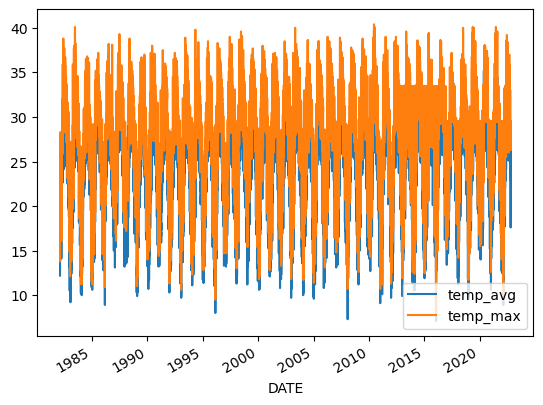

In [43]:
core_weather[["temp_avg", "temp_max"]].plot()

In [44]:
core_weather.index.year.value_counts().sort_index()

1982    307
1983    343
1984    301
1985    331
1986    341
1987    355
1988    338
1989    365
1990    354
1991    353
1992    357
1993    365
1994    365
1995    365
1996    366
1997    365
1998    364
1999    364
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    485
2013    725
2014    725
2015    727
2016    728
2017    723
2018    726
2019    728
2020    731
2021    721
2022    598
Name: DATE, dtype: int64

<AxesSubplot:xlabel='DATE'>

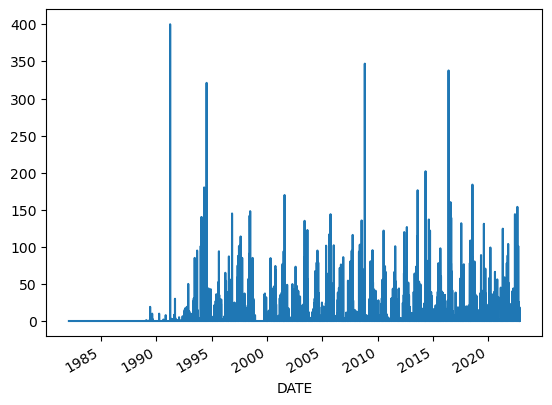

In [45]:
core_weather["precip"].plot()


In [46]:
#lol apparently we don't have accurate precipitation data from 1982 to around 1990

<AxesSubplot:xlabel='DATE'>

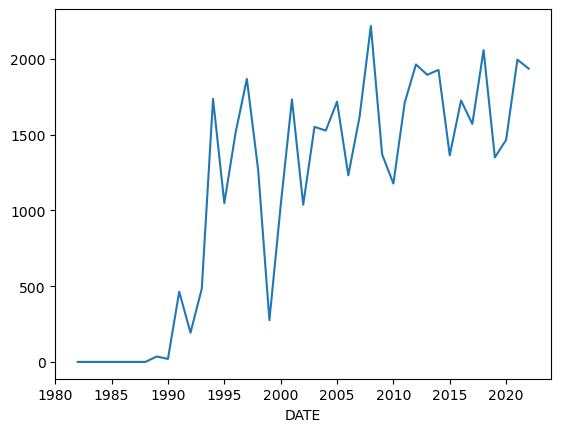

In [47]:
core_weather.groupby(core_weather.index.year).apply(lambda x: x["precip"].sum()).plot()

In [48]:
core_weather.groupby(core_weather.index.year).sum() #create one group for each year in our weather data, apply function to count up how much you get ranked

,precip,temp_avg,temp_max
DATE,,,
1982,0.0,7556.7,8498.2
1983,0.0,8047.4,9272.7
1984,0.0,7285.2,8301.8
1985,0.0,7832.2,8845.4
1986,0.0,8211.7,9350.5
1987,0.0,8860.2,10202.4
1988,0.0,8174.9,9486.9
1989,36.0,8616.3,9903.4
1990,19.8,8525.2,9861.5


In [49]:
core_weather.groupby(core_weather.index.year).sum()["precip"]

DATE
1982       0.0
1983       0.0
1984       0.0
1985       0.0
1986       0.0
1987       0.0
1988       0.0
1989      36.0
1990      19.8
1991     463.7
1992     192.8
1993     483.0
1994    1737.3
1995    1049.1
1996    1514.0
1997    1869.2
1998    1269.9
1999     275.6
2000    1032.6
2001    1733.6
2002    1038.2
2003    1552.5
2004    1527.8
2005    1718.4
2006    1232.3
2007    1619.8
2008    2218.9
2009    1370.1
2010    1177.9
2011    1711.3
2012    1964.5
2013    1896.2
2014    1928.4
2015    1364.7
2016    1726.4
2017    1571.8
2018    2058.9
2019    1350.7
2020    1466.5
2021    1996.1
2022    1936.7
Name: precip, dtype: float64

In [50]:
#Training our first ML model

In [51]:
#first thing is to figure out what we need to predict.

In [52]:
#here i want to predict tomorrow's maximum temperature using historical data

In [53]:
#create a target:
core_weather["target"] = core_weather.shift(-1)["temp_avg"] #shift(-1) will pull every row back one position

In [54]:
core_weather

,precip,temp_avg,temp_max,target
DATE,,,,
1982-02-11,0.0,12.2,15.1,13.1
1982-02-12,0.0,13.1,14.1,12.4
1982-02-13,0.0,12.4,13.8,13.4
1982-02-14,0.0,13.4,15.8,13.6
1982-02-16,0.0,13.6,15.5,14.5
...,...,...,...,...
2022-10-26,0.0,25.4,27.4,26.1
2022-10-27,0.0,26.1,27.4,26.3
2022-10-28,0.0,26.3,27.4,25.8


In [55]:
#we're gonna get rid of the last row with the null value
core_weather = core_weather.iloc[:-1,:].copy()

In [56]:
core_weather

,precip,temp_avg,temp_max,target
DATE,,,,
1982-02-11,0.0,12.2,15.1,13.1
1982-02-12,0.0,13.1,14.1,12.4
1982-02-13,0.0,12.4,13.8,13.4
1982-02-14,0.0,13.4,15.8,13.6
1982-02-16,0.0,13.6,15.5,14.5
...,...,...,...,...
2022-10-25,0.0,24.2,27.4,25.4
2022-10-26,0.0,25.4,27.4,26.1
2022-10-27,0.0,26.1,27.4,26.3


In [57]:
from sklearn.linear_model import Ridge #ridge regression is a type of regression that minimizes overfitting
reg = Ridge(alpha=.1) #=> initialize the model into variable "reg". alpha is a parameter that controls how much the coefficients of the regression model are penalized
#the greater the penalty, the more overfitting is prevented

In [58]:
#create a list called predictors:
predictors = ["precip","temp_avg","temp_max"]

In [59]:
#split data up into training set and a test set:
train = core_weather.loc[:"2020-12-31"] #training set

In [60]:
test = core_weather.loc["2021-01-01":]

In [61]:
train

,precip,temp_avg,temp_max,target
DATE,,,,
1982-02-11,0.0,12.2,15.1,13.1
1982-02-12,0.0,13.1,14.1,12.4
1982-02-13,0.0,12.4,13.8,13.4
1982-02-14,0.0,13.4,15.8,13.6
1982-02-16,0.0,13.6,15.5,14.5
...,...,...,...,...
2020-12-27,0.3,19.9,29.0,22.0
2020-12-28,0.0,22.0,29.0,23.1
2020-12-29,0.0,23.1,29.0,17.2


In [62]:
test

,precip,temp_avg,temp_max,target
DATE,,,,
2021-01-01,0.0,13.1,29.5,14.1
2021-01-02,0.0,14.1,29.5,16.1
2021-01-03,0.0,16.1,29.5,16.8
2021-01-04,0.0,16.8,29.5,17.5
2021-01-05,0.0,17.5,29.5,16.2
...,...,...,...,...
2022-10-25,0.0,24.2,27.4,25.4
2022-10-26,0.0,25.4,27.4,26.1
2022-10-27,0.0,26.1,27.4,26.3


In [63]:
#call the fit method on our regression model, fit it to our training data set with our predictors, and predict our target:
reg.fit(train[predictors],train["target"])

Ridge(alpha=0.1)

In [64]:
#so our model has been fitted.
#now we can generate predictions on our test data set using the predictor columns
predictions = reg.predict(test[predictors])

In [65]:
#now we have our predictions, we can see how well we did, and we'll use mean absolute error to do that
from sklearn.metrics import mean_absolute_error

In [66]:
#mean absolute error is basically subtract the actual from the predictions, take the absolute value and find the average of that across all of the predictions

In [67]:
#so target is our actual value:
mean_absolute_error(test["target"],predictions)

1.3531170476068153

In [68]:
#this means on average we're about 1.35 off the actual temperature. NOT BAD.

In [69]:
#EVALUATING OUR MODEL

In [70]:
#now let's combine our actuals and our predictions to see the actual values and the predictions side by side
#we're gonna concatenate the actuals which are test target with the predictions
#but to concatenate the predictions, we need to convert it from numpy arrays to a panda series with the same index as our test data
#we're gonna concatenate them on axis 1, which means each series is a column
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual","predictions"]

In [71]:
combined

,actual,predictions
DATE,,
2021-01-01,14.1,13.684409
2021-01-02,16.1,14.628490
2021-01-03,16.8,16.516654
2021-01-04,17.5,17.177511
2021-01-05,16.2,17.838368
...,...,...
2022-10-25,25.4,24.170009
2022-10-26,26.1,25.302907
2022-10-27,26.3,25.963764


<AxesSubplot:xlabel='DATE'>

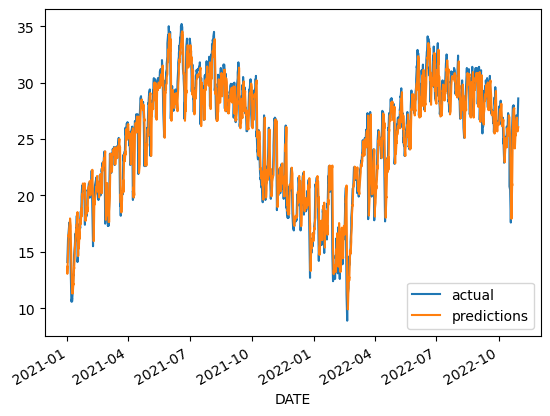

In [72]:
combined.plot()

In [73]:
#we can take a look at our coefficients of the regression model to see how the different variables are being used by the model
reg.coef_

array([ 0.01440469,  0.94408164, -0.00299724])

In [74]:
#so precipitation has positive impact on temperature (i guess it makes sense? cuz in hanoi it tends to rain more in the summer)
#temp_avg is obviously the biggest imput here => the previous day average temperature is a big input to tomorrow's  avg temp
#and the maximum temperature has negative impact cuz obviously it is higher than average temp.

In [75]:
#what is the average maximum temperature this month? we can use a rolling mean
#use panda's rolling method to find a rolling mean for a certain  period
#what this will do is it'll look back 30 days from each day and then find the average of a certain column during that period
core_weather["month_avg"] = core_weather["temp_avg"].rolling(30).mean()
#what this says is for the temperature max column for the 30 days before every row, find the rolling mean and assign to the month_max variable

In [76]:
#for this day, was the temperature different from the month monthly mean or not?
core_weather["month_day_avg"] = core_weather["month_avg"]/core_weather["temp_avg"]

In [77]:
#ratio between max and average temp (i don't use min cuz apparently i deleted min, as there were too many missing data)
core_weather["avg_max"] = core_weather["temp_avg"]/core_weather["temp_max"]

In [78]:
#before using the create prediction function, we need to deal with the null values
#remove first 30 rows:
core_weather = core_weather.iloc[30:,:].copy()

In [79]:
#CREATING A FUNCTION TO MAKE PREDICTIONS

In [80]:
#let's create a function to wrap up everything we did (splitting the training and test set, generating the predictions, then combine)
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:"2020-12-31"]
    test = core_weather.loc["2021-01-01":]
    
    reg.fit(train[predictors],train["target"])
    predictions = reg.predict(test[predictors])
    
    error = mean_absolute_error(test["target"],predictions)
    
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)],axis=1)
    combined.columns = ["actual","predictions"]
    return error, combined

In [81]:
predictors = ["precip","temp_avg","temp_max","month_avg"]
#at first i included avg_max and month_day_avg but somehow they increased the error,
#so i decided to remove them
error, combined = create_predictions(predictors, core_weather, reg)
error

1.351921704105601

<AxesSubplot:xlabel='DATE'>

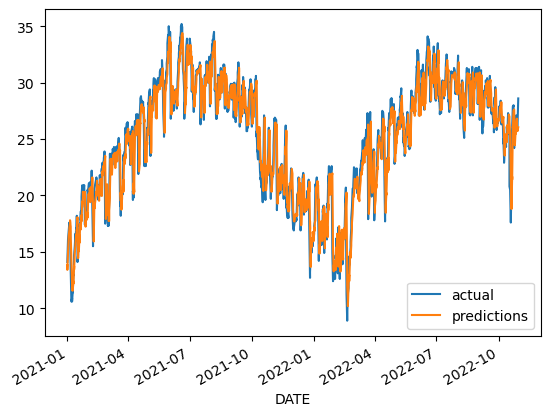

In [82]:
combined.plot()

In [83]:
#ADDING IN MONTHLY AND DAILY AVERAGES

In [84]:
core_weather

,precip,temp_avg,temp_max,target,month_avg,month_day_avg,avg_max
DATE,,,,,,,
1982-03-17,0.0,23.2,16.7,23.2,18.393333,0.792816,1.389222
1982-03-18,0.0,23.2,26.0,23.4,18.730000,0.807328,0.892308
1982-03-19,0.0,23.4,26.0,23.4,19.096667,0.816097,0.900000
1982-03-20,0.0,23.4,26.0,22.7,19.430000,0.830342,0.900000
1982-03-21,0.0,22.7,26.0,22.5,19.733333,0.869310,0.873077
...,...,...,...,...,...,...,...
2022-10-25,0.0,24.2,27.4,25.4,26.000000,1.074380,0.883212
2022-10-26,0.0,25.4,27.4,26.1,25.840000,1.017323,0.927007
2022-10-27,0.0,26.1,27.4,26.3,25.690000,0.984291,0.952555


In [91]:
core_weather["monthly_avg"] = core_weather["temp_max"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())
#what the function in apply() does is just take the previous rows and calculates the mean
#this is to make sure that we're using past data to predict, not using future knowledge

/tmp/ipykernel_786367/3723808579.py:1: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  core_weather["monthly_avg"] = core_weather["temp_max"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean()).copy()


ValueError: cannot reindex on an axis with duplicate labels